In [1]:
import pandas as pd
import functions as fn
from IPython.display import clear_output
# import datetime as dt
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
# cals = fn.open_cals_file('cals.txt')

In [3]:
cals = {
    'Общий':'https://calendar.google.com/calendar/ical/grinkevichgex%40gmail.com/private-acf1e2f93eb55461f4fcb1c21e917169/basic.ics',
    'Быт':'https://calendar.google.com/calendar/ical/bv6595ijs9c44ato3r8fb7m7q4%40group.calendar.google.com/private-f8c7c3dadc2e3ce214dd0f59503b0878/basic.ics',
    'Дорога':'https://calendar.google.com/calendar/ical/bv6595ijs9c44ato3r8fb7m7q4%40group.calendar.google.com/private-f8c7c3dadc2e3ce214dd0f59503b0878/basic.ics',
    'Еда':'https://calendar.google.com/calendar/ical/inquvd5l166rpghr03ssc152u0%40group.calendar.google.com/private-2e850cf70ed5e06e39d61bdcc19adbfa/basic.ics',
    'Сон':'https://calendar.google.com/calendar/ical/b8aiggocfqk5civg5tqceh3ckk%40group.calendar.google.com/private-bc6a4537563a0b7259428ed1dffd6a8c/basic.ics',
    'Тренирвки':'https://calendar.google.com/calendar/ical/s22sjiq9h8g98447t17k83crg4%40group.calendar.google.com/private-784e14ef59d56add0e1c5e48bd63c957/basic.ics',
    'Учеба':'https://calendar.google.com/calendar/ical/csnoal8l8u4j6jnru48vuq18n8%40group.calendar.google.com/private-6553f2b48dc3575ec15a58fe94dc29e0/basic.ics',
    'Sima':'https://calendar.google.com/calendar/ical/n1jc1v4lpkc3adgn80qb1r76t0%40group.calendar.google.com/private-66ca04810528d34da54314961b741846/basic.ics',
    'Тест':'https://calendar.google.com/calendar/ical/4776822995e93bcb2b0e17a8e9f8d59e8c27deadd9b8d65ee7111976c96a3add%40group.calendar.google.com/private-49b17c42fd7686307197ff53241c781f/basic.ics',
    # 'Яндекс':'https://calendar.yandex.ru/export/ics.xml?private_token=6aedacbc4a8d2234a98c4d52bbc255401e6bacfd&tz_id=Asia/Yekaterinburg',
    # 'РабочийЗадачи':'https://calendar.yandex.ru/export/ics.xml?private_token=af26788303898b2560a54f65a6fac8a0cdf7db72&tz_id=Asia/Yekaterinburg',
    # 'РабочийВстречи':'https://calendar.yandex.ru/export/ics.xml?private_token=2e97636928fa46925c384a558b9a5f691fa6d78b&tz_id=Asia/Yekaterinburg'
}

In [4]:
# temp_cal = fn.get_cal( cals['Тест'] )
# temp_cal = fn.parse_cal(temp_cal)
# temp_df = fn.create_schedule(temp_cal, '2023-11-20', '2023-11-26')

In [5]:
url = cals['Тест']

In [6]:
url

'https://calendar.google.com/calendar/ical/4776822995e93bcb2b0e17a8e9f8d59e8c27deadd9b8d65ee7111976c96a3add%40group.calendar.google.com/private-49b17c42fd7686307197ff53241c781f/basic.ics'

In [7]:
cal = fn.get_cal(url)

In [8]:
schedule = pd.DataFrame()
cals_qty = len(cals)
counter = 1

for cal, url in cals.items():
    print(cal, f"{counter}/{cals_qty}")
    counter += 1
    temp_cal = fn.get_cal(url)
    temp_cal = fn.parse_cal(temp_cal)
    temp_df = fn.create_schedule(temp_cal, '2023-11-20', '2023-11-26')
    temp_df['cal'] = cal
    #
    schedule = pd.concat([schedule, temp_df], axis=0, ignore_index=True)
    clear_output(wait=True)
    del temp_cal
    del temp_df

Тест 9/9


In [9]:
schedule

,dtstart,dtend,status,summary,duration,cals,description
0,2023-11-21 23:00:00,2023-11-22 00:00:00,CONFIRMED,Собраться на завтра,1.0,Быт,NaN
1,2023-11-21 17:30:00,2023-11-21 18:00:00,CONFIRMED,Посмотреть распределительную коробку,0.5,Быт,NaN
2,2023-11-25 10:00:00,2023-11-25 12:00:00,CONFIRMED,Сделать трубу под раковиной в ванной,2.0,Быт,NaN
3,2023-11-25 09:00:00,2023-11-25 10:00:00,CONFIRMED,Купить сифон,1.0,Быт,NaN
4,2023-11-25 07:00:00,2023-11-25 09:00:00,CONFIRMED,Почистить снег,2.0,Быт,NaN
...,...,...,...,...,...,...,...
112,2023-11-20 13:00:00,2023-11-20 18:00:00,CONFIRMED,Работа,5.0,Sima,NaN
113,2023-11-21 13:00:00,2023-11-21 18:00:00,CONFIRMED,Работа,5.0,Sima,NaN
114,2023-11-22 13:00:00,2023-11-22 18:00:00,CONFIRMED,Работа,5.0,Sima,NaN
115,2023-11-23 13:00:00,2023-11-23 18:00:00,CONFIRMED,Работа,5.0,Sima,NaN


<Axes: ylabel='duration'>

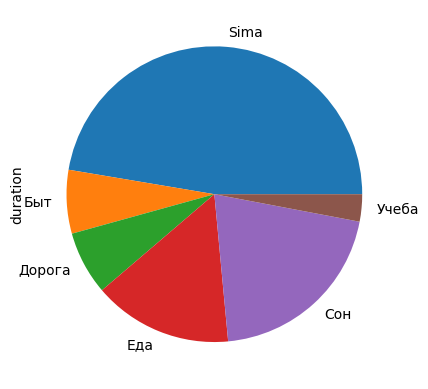

In [10]:
schedule.groupby('cals').sum('duration').plot.pie(y='duration', legend=False)

In [11]:
schedule['cals'].unique()

array(['Быт', 'Дорога', 'Еда', 'Сон', 'Учеба', 'Sima'], dtype=object)

<Axes: ylabel='duration'>

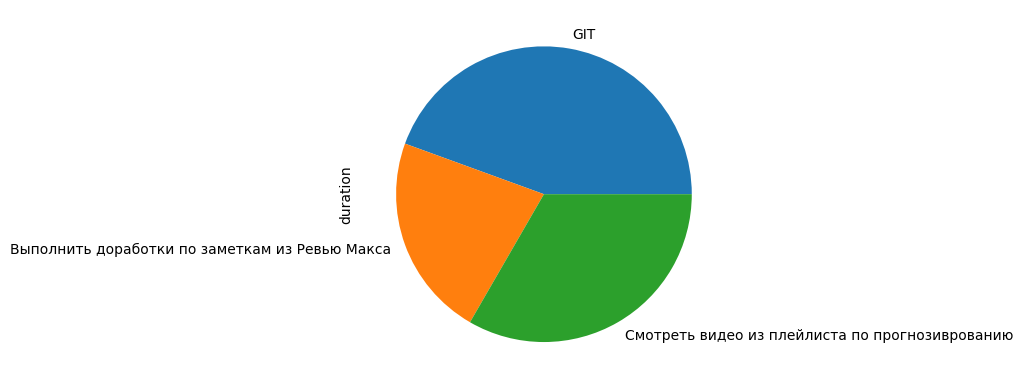

In [12]:
schedule[schedule['cals'] == 'Учеба'].groupby('summary').sum('duration').plot.pie(y='duration', legend=False)

In [13]:
# t1.query("dtstart >= '2023-11-06' and dtstart <='2023-11-12'") \
#     .sort_values('dtstart', ascending=False) \
#     .groupby('summary')['duration'].sum() \
#     .to_clipboard()